In [33]:
#libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import statsmodels.formula.api as sm
from linearmodels.iv import IV2SLS
%matplotlib inline


## Problem 1

In [34]:
data = pd.read_csv('data_assignment4_1.csv')
data.head()

,country,month,satisfaction
0,US,April,4.0
1,US,April,5.0
2,US,April,NaN
3,US,April,5.0
4,US,April,1.0


In [35]:
data.isna().sum()

country          0
month            0
satisfaction    49
dtype: int64

In [36]:
data.shape

(3000, 3)

In [37]:
#filling nans with the mean value
data['satisfaction'].fillna(round(data['satisfaction'].mean()), inplace=True)

In [38]:
data.isnull().sum()

country         0
month           0
satisfaction    0
dtype: int64

In [39]:
data['satisfaction']

0       4.0
1       5.0
2       5.0
3       5.0
4       1.0
       ... 
2995    0.0
2996    4.0
2997    4.0
2998    3.0
2999    5.0
Name: satisfaction, Length: 3000, dtype: float64

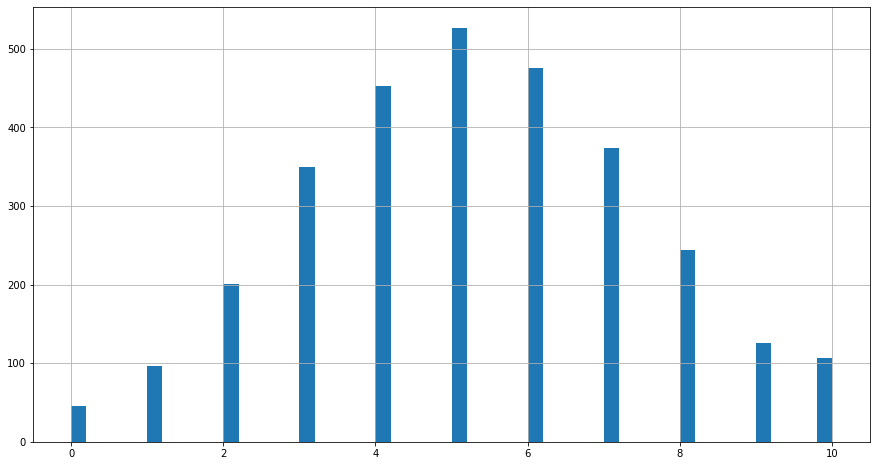

In [40]:
data.satisfaction.hist(bins=50, figsize=(15,8))
plt.show()

In [41]:
data.satisfaction.unique()

array([ 4.,  5.,  1.,  7.,  8.,  3., 10.,  6.,  2.,  9.,  0.])

In [42]:
data.month.unique()

array(['April', 'May', 'June', 'July', 'August'], dtype=object)

In [43]:
data.country.unique()

array(['US', 'CA', 'AU'], dtype=object)

##### Question 1

In [44]:
#labelencoder = LabelEncoder()
#df = data.copy()
#df['country_num'] = labelencoder.fit_transform(df['country'])
#df['month_num'] = labelencoder.fit_transform(df['month'])
#df

In [45]:
df = data.loc[(data.country == 'US') & ((data.month == 'July')|(data.month == 'August'))]
df

,country,month,satisfaction
600,US,July,4.0
601,US,July,1.0
602,US,July,4.0
603,US,July,2.0
604,US,July,3.0
...,...,...,...
995,US,August,6.0
996,US,August,4.0
997,US,August,7.0
998,US,August,5.0


In [46]:
df.loc[df['month'] == 'August', 'treatment'] = 1 
df.loc[df['month'] == 'July', 'treatment'] = 0
df

/Users/a.khachatryan/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/Users/a.khachatryan/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,country,month,satisfaction,treatment
600,US,July,4.0,0.0
601,US,July,1.0,0.0
602,US,July,4.0,0.0
603,US,July,2.0,0.0
604,US,July,3.0,0.0
...,...,...,...,...
995,US,August,6.0,1.0
996,US,August,4.0,1.0
997,US,August,7.0,1.0
998,US,August,5.0,1.0


In [47]:
model = sm.ols(formula="satisfaction ~ treatment", data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           satisfaction   R-squared:                       0.050
Model:                            OLS   Adj. R-squared:                  0.048
Method:                 Least Squares   F-statistic:                     21.03
Date:                Mon, 28 Sep 2020   Prob (F-statistic):           6.07e-06
Time:                        00:47:45   Log-Likelihood:                -818.10
No. Observations:                 400   AIC:                             1640.
Df Residuals:                     398   BIC:                             1648.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.6450      0.133     35.028      0.0

##### Question 3

In [48]:
dff = data.copy()
df_usca = dff.loc[((dff.country == 'US')|(dff.country == 'CA')) & ((dff.month == 'July')|(dff.month == 'August'))]

In [49]:
df_usau = dff.loc[((dff.country == 'US')|(dff.country == 'AU')) & ((dff.month == 'July')|(dff.month == 'August'))]

In [50]:
df_usca.loc[df_usca['month'] == 'August', 'month_tr'] = 1 
df_usca.loc[df_usca['month'] == 'July', 'month_tr'] = 0
df_usca.loc[df_usca['country'] == 'US', 'country_tr'] = 1 
df_usca.loc[df_usca['country'] == 'CA', 'country_tr'] = 0
df_usau.loc[df_usau['month'] == 'August', 'month_tr'] = 1 
df_usau.loc[df_usau['month'] == 'July', 'month_tr'] = 0
df_usau.loc[df_usau['country'] == 'US', 'country_tr'] = 1 
df_usau.loc[df_usau['country'] != 'US', 'country_tr'] = 0 

In [51]:
model_ca = sm.ols(formula="satisfaction ~ month_tr + country_tr + month_tr*country_tr", data=df_usca).fit()
print(model_ca.summary())

                            OLS Regression Results                            
Dep. Variable:           satisfaction   R-squared:                       0.160
Model:                            OLS   Adj. R-squared:                  0.156
Method:                 Least Squares   F-statistic:                     50.41
Date:                Mon, 28 Sep 2020   Prob (F-statistic):           7.81e-30
Time:                        00:47:45   Log-Likelihood:                -1633.6
No. Observations:                 800   AIC:                             3275.
Df Residuals:                     796   BIC:                             3294.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               6.8000    

In [52]:
model_au = sm.ols(formula="satisfaction ~ month_tr + country_tr + month_tr*country_tr", data=df_usau).fit()
print(model_au.summary())

                            OLS Regression Results                            
Dep. Variable:           satisfaction   R-squared:                       0.075
Model:                            OLS   Adj. R-squared:                  0.071
Method:                 Least Squares   F-statistic:                     21.42
Date:                Mon, 28 Sep 2020   Prob (F-statistic):           2.40e-13
Time:                        00:47:45   Log-Likelihood:                -1653.7
No. Observations:                 800   AIC:                             3315.
Df Residuals:                     796   BIC:                             3334.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               4.3400    

##### Question 2

In [53]:
df_q2 = dff.groupby([dff.country, dff.month], sort=False).mean()
df_q2

satisfaction
country month               
US      April          5.270
        May            4.870
        June           4.600
        July           4.645
        August         5.505
CA      April          7.155
        May            6.755
        June           6.385
        July           6.800
        August         6.270
AU      April          3.685
        May            4.115
        June           3.680
        July           4.340
        August         4.055

Text(0, 0.5, 'Mean satisfaction')

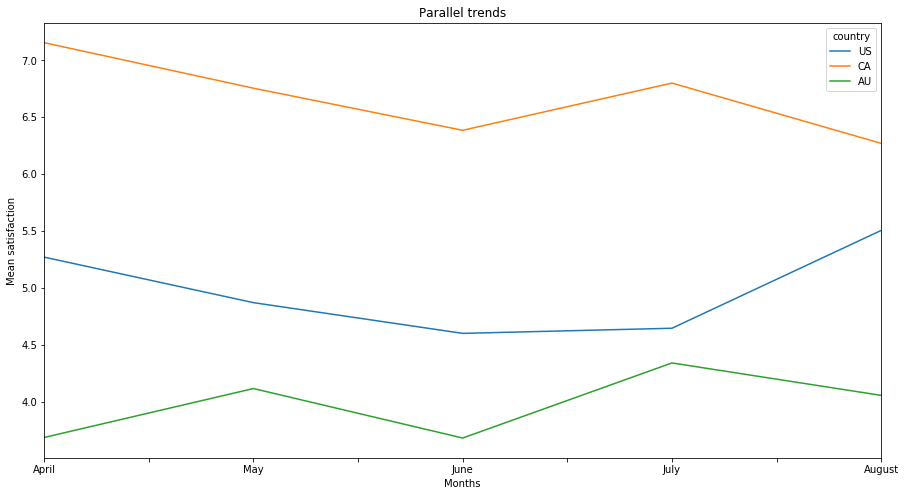

In [54]:
# plot data
fig, ax = plt.subplots(figsize=(15,8))
dff.groupby([dff.month, dff.country], sort = False).mean()['satisfaction'].unstack().plot(ax=ax)
plt.title('Parallel trends')
plt.xlabel('Months')
plt.ylabel('Mean satisfaction')

## Problem 2

In [55]:
data1 = pd.read_csv('data_assignment4_2.csv')
data1.head()

,queue,treatment,satisfaction,popups
0,NaN,0,3,1
1,NaN,0,7,1
2,NaN,0,6,1
3,17772.0,0,7,0
4,NaN,0,3,1


In [56]:
data1.isna().sum()

queue           10000
treatment           0
satisfaction        0
popups              0
dtype: int64

In [57]:
data1.shape

(30000, 4)

In [58]:
data1.queue.unique()

array([   nan, 17772., 16780., ...,   906., 18141., 16974.])

In [59]:
#dropping nans
data = data1.dropna()

Text(0, 0.5, 'Satisfaction')

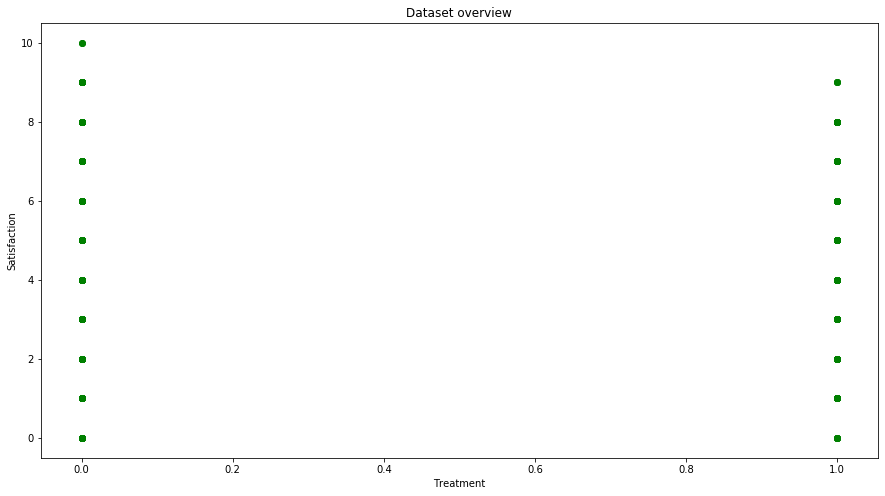

In [60]:
plt.figure(figsize = (15,8))
plt.scatter(data1['treatment'], data1['satisfaction'], color = 'green')
plt.title('Dataset overview')
plt.xlabel('Treatment')
plt.ylabel('Satisfaction')

In [61]:
data.shape

(20000, 4)

##### Question 2

##### part b

In [62]:
model = sm.ols(formula="satisfaction ~ queue + treatment", data=data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           satisfaction   R-squared:                       0.076
Model:                            OLS   Adj. R-squared:                  0.076
Method:                 Least Squares   F-statistic:                     825.1
Date:                Mon, 28 Sep 2020   Prob (F-statistic):               0.00
Time:                        00:57:59   Log-Likelihood:                -34548.
No. Observations:               20000   AIC:                         6.910e+04
Df Residuals:                   19997   BIC:                         6.913e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.2285      0.052     42.984      0.0

##### part c

In [63]:
dff = data.loc[(data.queue >= 9000) & (data.queue <= 11000)]
model = sm.ols(formula="satisfaction ~ queue + treatment", data=dff).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           satisfaction   R-squared:                       0.111
Model:                            OLS   Adj. R-squared:                  0.110
Method:                 Least Squares   F-statistic:                     124.2
Date:                Mon, 28 Sep 2020   Prob (F-statistic):           1.45e-51
Time:                        00:58:22   Log-Likelihood:                -3525.0
No. Observations:                2001   AIC:                             7056.
Df Residuals:                    1998   BIC:                             7073.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.5328      1.147      3.081      0.0

##### Question 3

##### part b

In [64]:
#iv = popups
#response = satisfaction 
#1 st regression:
model_1s = sm.ols('treatment ~ popups', data = data1).fit()
print(model_1s.summary())

                            OLS Regression Results                            
Dep. Variable:              treatment   R-squared:                       0.179
Model:                            OLS   Adj. R-squared:                  0.179
Method:                 Least Squares   F-statistic:                     6551.
Date:                Mon, 28 Sep 2020   Prob (F-statistic):               0.00
Time:                        00:58:26   Log-Likelihood:                -17044.
No. Observations:               30000   AIC:                         3.409e+04
Df Residuals:                   29998   BIC:                         3.411e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5333      0.003    152.788      0.0

#### the regression says that only 60% of people are willing to consume low-sodium meals even though they got ads about that 

In [67]:
#2nd regression
#finding treatment hat
data1['treatment_hat'] = 0.5333 - .3992 * data1.popups # treatment hat
model_2d = sm.ols('satisfaction ~ treatment_hat', data = data1).fit()

In [68]:
print(model_2d.summary())

                            OLS Regression Results                            
Dep. Variable:           satisfaction   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     537.5
Date:                Mon, 28 Sep 2020   Prob (F-statistic):          7.06e-118
Time:                        00:59:06   Log-Likelihood:                -54324.
No. Observations:               30000   AIC:                         1.087e+05
Df Residuals:                   29998   BIC:                         1.087e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         4.2540      0.017    255.791

##### part c

In [69]:
#RUN BOOTSTRAP
samples = []
t = data1.treatment
y = data1.satisfaction
# Pick a large number of iterations to wash away sampling noise
for i in range(2000):
    index = np.append(np.random.choice(y[(t==0)].index,len(y[(t==0)].index), replace=True),
                      np.random.choice(y[(t==1)].index,len(y[(t==1)].index), replace=True))
    samples.append(sm.ols(formula = "satisfaction ~ treatment_hat", data=data1.iloc[index]).fit().params[1])

In [71]:
print("Treatment effect via bootstrap: " + str(round(np.mean(samples), 3)))
print("The standard error of estimated treatment effect = " + str(round(np.std(samples), 3)))

Treatment effect via bootstrap: 0.992
The standard error of estimated treatment effect = 0.043


## Problem 3

In [89]:
# define bootstrap function
def bootstrap(data, iterations = 1000):
    np.random.seed(123)
    data = np.array([data] * iterations) # create number of parellel bootstrap

    s= np.zeros([data.shape[0],data.shape[1]])# starting with 0
    n= np.zeros([data.shape[0],data.shape[1]])
    w = np.random.poisson(1, [data.shape[0],data.shape[1]])
    s = data * w 
    n = n + w
    mean = np.sum(s, axis=1)/np.sum(n, axis=1)
    return mean

np.random.seed(123)
stream = np.array([np.random.choice(np.arange(30,51), 100000) for _ in range(5)]) #5 batches of data

In [90]:
#  
generate streaming mean and SE per batch
mean_list = []
se_list = []
for i,j in enumerate(stream):
    se_list.append(np.std(bootstrap(j, 1000)))
    mean_list.append(np.mean(bootstrap(j, 1000)))

In [ ]:

# define bootstrap function
def bootstrap(data, iterations = 1000):
    np.random.seed(123)
    data = np.array([data] * iterations) # create number of parellel bootstrap

    s= np.zeros([data.shape[0],data.shape[1]])# starting with 0
    n= np.zeros([data.shape[0],data.shape[1]])
    w = np.random.poisson(1, [data.shape[0],data.shape[1]])
    s = data * w 
    n = n + w
    mean = np.sum(s, axis=1)/np.sum(n, axis=1)
    return mean


np.random.seed(123)
#5 batches of data
stream = np.array([np.random.choice(np.arange(30,51), 100000) for _ in range(5)]) 
mean_list = [] #create list for mean values
se_list = [] #create list for se values
for i,j in enumerate(stream):
    se_list.append(np.std(bootstrap(j, 1000)))
    mean_list.append(np.mean(bootstrap(j, 1000)))


In [93]:
lst1 = range(1, 6)
mean_se_df = pd.DataFrame(
    {'batch': lst1,
     'Mean': mean_list,
     'Standard Error': se_list
    })
mean_se_df

,batch,Mean,Standard Error
0,1,40.018590,0.018845
1,2,39.971242,0.018973
2,3,39.993500,0.019080
3,4,39.983950,0.018954
4,5,39.964986,0.019287
